# Part 1: Data Preparation and Exploration on iris data 

## Q1 : Load iris data set that is shared as part of the assignment. Data contains a mix of continuous and categorical. Provide a brief exploratory data analysis, including statistics, distributions, and any patterns observed.

### Import Libraries

In [255]:
import pandas as pd #manipulating datasets
import matplotlib.pyplot as plt #visual representation of data
import numpy as np #numerical calculations
from scipy.stats import norm #normalisation of data
from sklearn.preprocessing import StandardScaler #standarise the data
from scipy import stats #to find statistical data
import seaborn as sns

### Data Collection

In [256]:
df = pd.read_csv('/Users/vidhyabharath/Documents/Assignment-2/iris.csv')
df.shape

(168, 5)

### Get the details of the columns and column types

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  164 non-null    float64
 1   sepal_width   163 non-null    float64
 2   petal_length  163 non-null    float64
 3   petal_width   168 non-null    float64
 4   species       168 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.7+ KB


### Statistics

In [258]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,164.000000,163.000000,163.000000,168.000000
mean,5.832927,3.080368,3.679141,1.173810
std,1.044595,0.552308,1.756204,0.757101
min,1.000000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,11.000000,7.500000,6.900000,2.500000


### Distribution

#### SCATTERPLOT

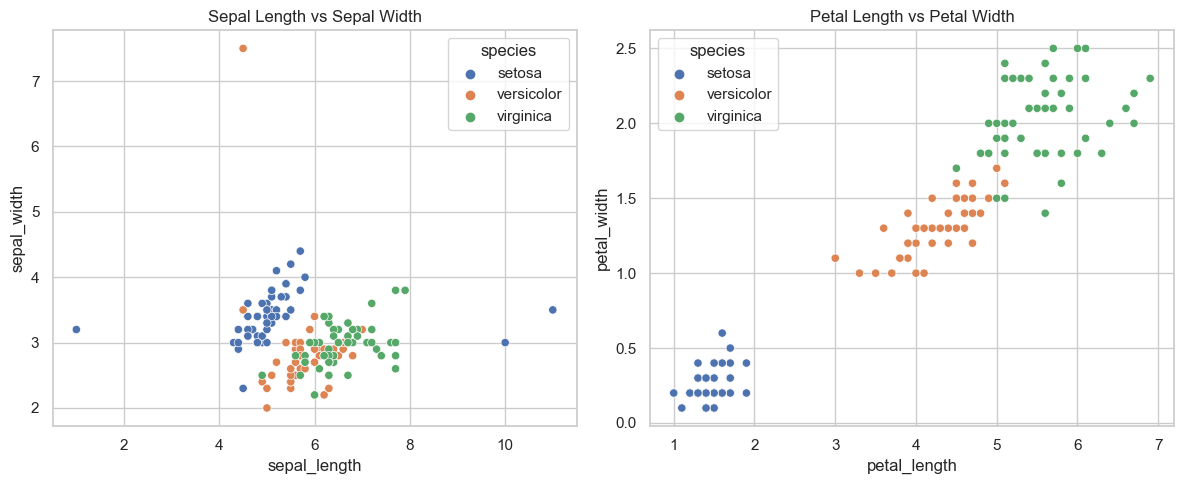

In [261]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot for sepal_length vs sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, ax=axes[0])
axes[0].set_title('Sepal Length vs Sepal Width')

# Scatterplot for petal_length vs petal_width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, ax=axes[1])
axes[1].set_title('Petal Length vs Petal Width')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

In [262]:
# Here the values are almost equally distributed.However there is 
# overlapping between versicolor and virginica

#### PAIRPLOT

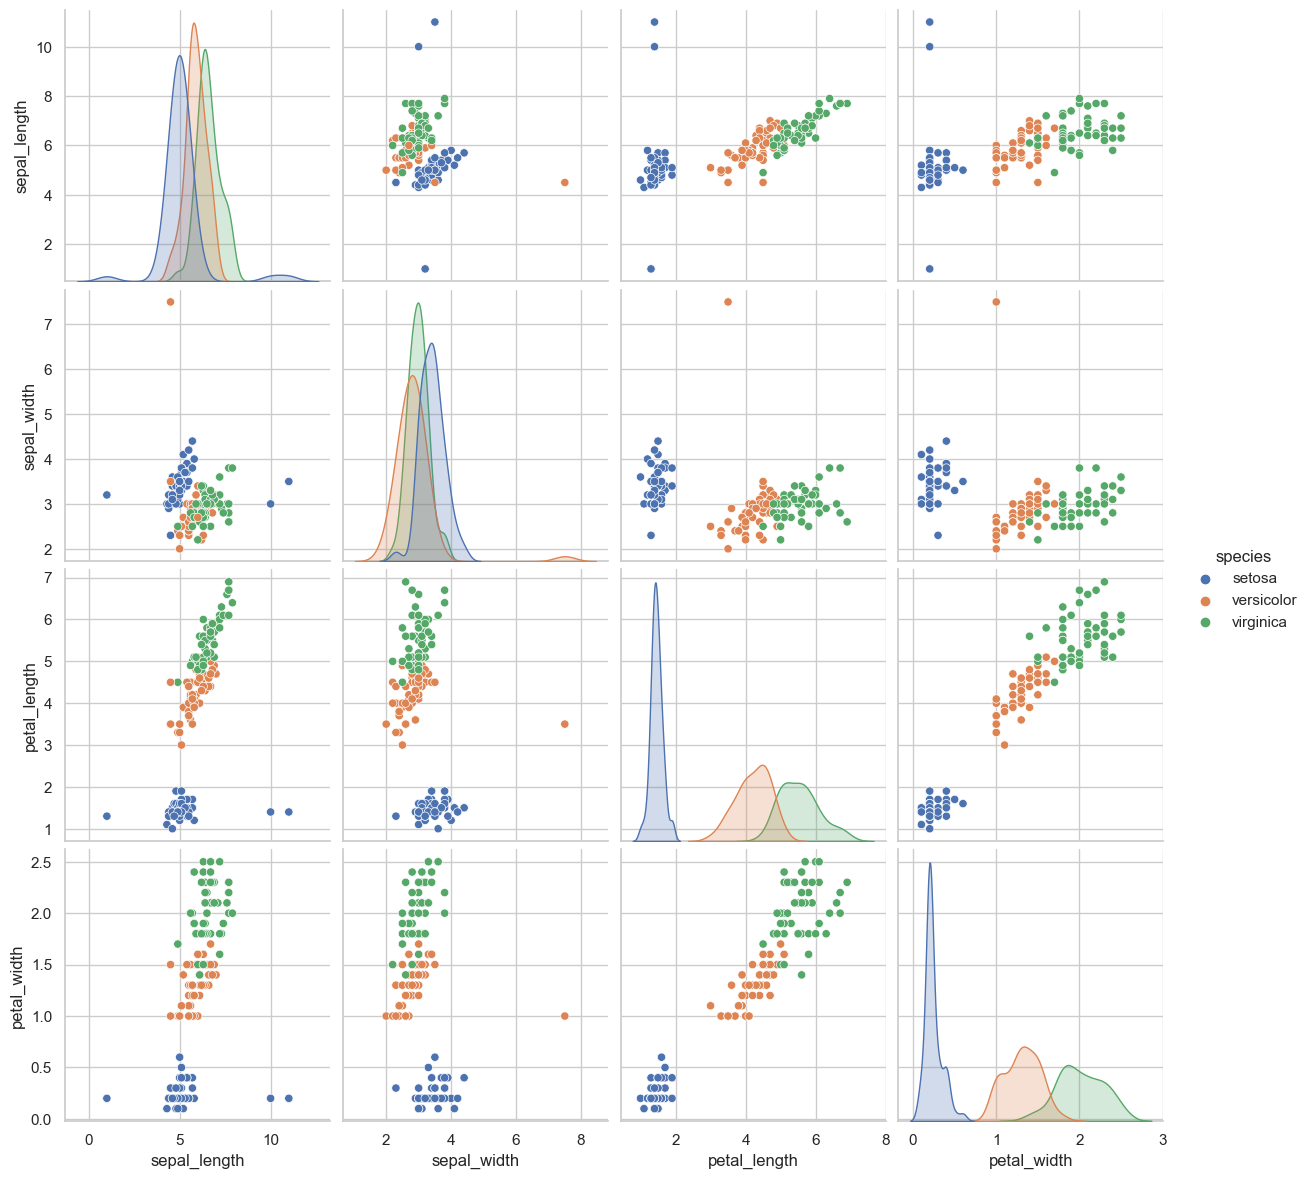

In [263]:
#A pair plot is used to visualize pairwise relationships between different variables 
#in a dataset, providing insights into 
#correlations and distributions in a concise and comprehensive manner
sns.set_style('whitegrid')
sns.pairplot(df, hue='species',size=3);
plt.show();

In [334]:
# Observation :- 
#1 Setosa can be separated easily and is linearly separable. 
#2 The features petal_length and petal_width are the most informative in determining the flower type. 
#3 Versicolor and Virginica are overlapped

### DISTPLOT

In [266]:
#Univariate analysis - Distplot is used basically for the univariant set of observations 
#and visualizes it through a histogram

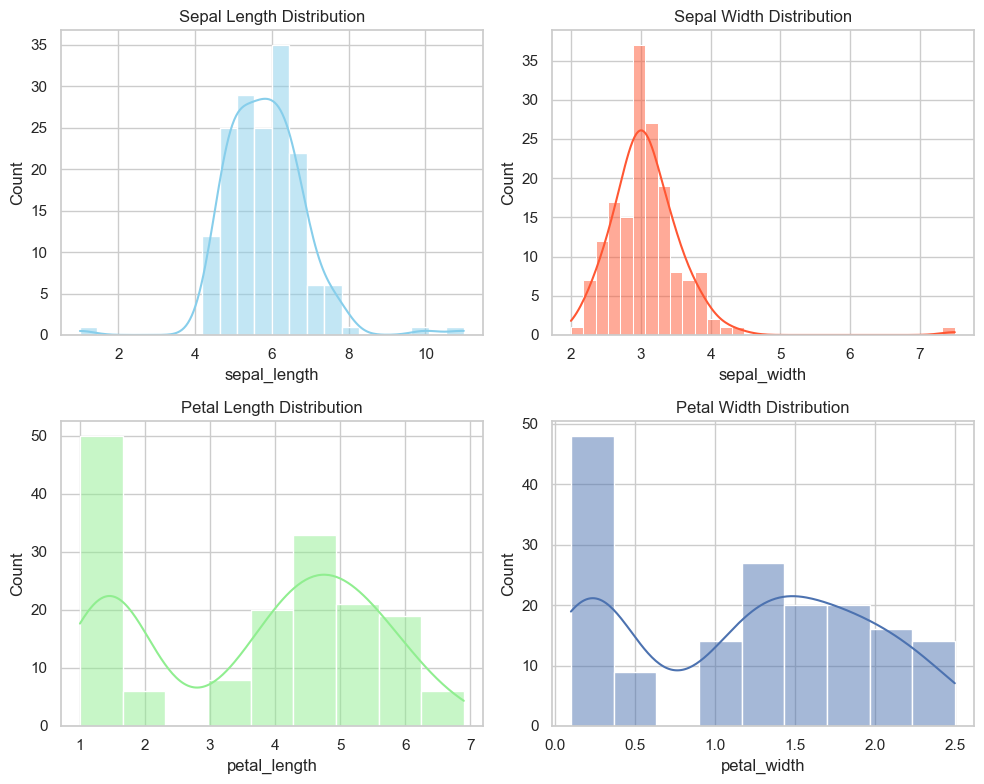

In [267]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Define colors for each feature
colors = ['skyblue', 'yellow', 'lightgreen', 'lightcoral']

# Distplot for sepal_length
sns.histplot(df['sepal_length'], kde=True, ax=axes[0, 0],color=colors[0] )
axes[0, 0].set_title('Sepal Length Distribution')

# Distplot for sepal_width
sns.histplot(df['sepal_width'], kde=True, ax=axes[0, 1],color="#FF5733" )
axes[0, 1].set_title('Sepal Width Distribution')

# Distplot for petal_length
sns.histplot(df['petal_length'], kde=True, ax=axes[1, 0],color=colors[2] )
axes[1, 0].set_title('Petal Length Distribution')

# Distplot for petal_width
sns.histplot(df['petal_width'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width Distribution')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

In [268]:
#Observation
# petal_length is the best to be considered for the classification feature as there is no overlapping
# petal_width has slight overlapping, still can be considered the next best feature for selection
# In sepal_length and sepal_width there is more overlapping 

#### BoxPlot

In [269]:
#Represents the distribution of data and highlights outliers
# useful for detecting variations and central tendencies.

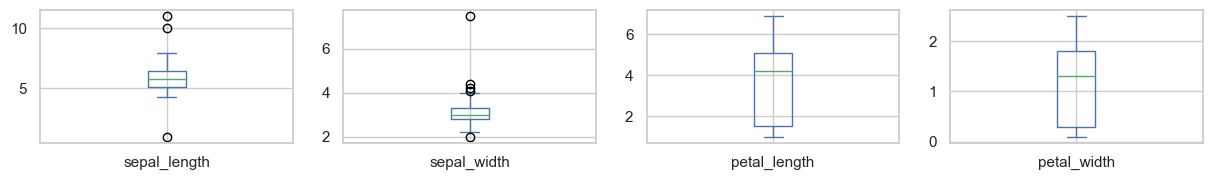

In [272]:
sns.set(style='whitegrid',rc={'figure.figsize':(15,10)})
# Set the number of subplots in each row
num_cols = 3
df.plot(kind='box',subplots=True,layout=(5,4),sharex=False)
plt.show()
#In the output we can see there are outliers below the min and max point in setosa. 

In [273]:
#Observation:
# There exists some outliers in sepal_length and sepal_width

### Correlation

In [329]:
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include='number')
# Calculate the correlation matrix
numeric_cols_corr = numeric_cols.corr()

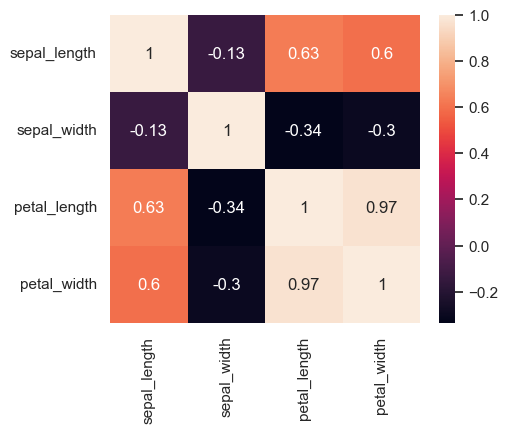

In [330]:
# Visualisation of correlation using heatmaps
plt.figure(figsize=(5,4))
sns.heatmap(numeric_cols_corr,annot=True);
plt.show()

In [276]:
#Observation :
#All light colors are positively or highly correlated 
#petal_length and petal_width is highly correlated with with 0.97 
#whereas those are in dark are negatively correlated
# If any values are highly corelated those values can be ignored 
# This is in case where there are many variables
# In this data, petal_length and sepal_width are highly correlated
# Since there are only 4 variables we are not neglecting any

## Q2 : Handle missing values and outliers in your dataset. Document your strategy and justify your choices.

### Missing values

In [277]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

sepal_length    4
sepal_width     5
petal_length    5
petal_width     0
species         0
dtype: int64


In [278]:
#find which species has missing values
# Grouping by species variable and calculating count of missing values for each feature
missing_values_count = df.groupby('species').apply(lambda x: x.isnull().sum())

print(missing_values_count)

            sepal_length  sepal_width  petal_length  petal_width  species
species                                                                  
setosa                 0            3             1            0        0
versicolor             2            2             1            0        0
virginica              2            0             3            0        0


### Impute Missing values

In [279]:
#For setosa since there are outliers we will apply median in the null values
#Impute missing values in 'petal_length' column with the median of that column

# Calculate the median of 'petal_length' for 'setosa'
setosa_median_petal_length = df[df['species'] == 'setosa']['petal_length'].median()
# Impute missing values in 'petal_length' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['petal_length'].isnull()), 'petal_length'] = setosa_median_petal_length

# Calculate the median of 'sepal_width' for 'setosa'
setosa_median_sepal_width = df[df['species'] == 'setosa']['sepal_width'].median()
# Impute missing values in 'sepal_width' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['sepal_width'].isnull()), 'sepal_width'] = setosa_median_sepal_width


#For versicolor and virginica since there are no outliers, we will impute mean in the null values
# Calculate the mean of 'sepal_length' for 'versicolor'
versicolor_mean_sepal_length = df[df['species'] == 'versicolor']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_length'].isnull()), 'sepal_length'] = versicolor_mean_sepal_length

# Calculate the median of 'sepal_width' for 'versicolor'
versicolor_mean_sepal_width = df[df['species'] == 'versicolor']['sepal_width'].mean()
# Impute missing values in 'sepal_width' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_width'].isnull()), 'sepal_width'] = versicolor_mean_sepal_width

# Calculate the mean of 'petal_length' for 'versicolor'
versicolor_mean_petal_length = df[df['species'] == 'versicolor']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['petal_length'].isnull()), 'petal_length'] = versicolor_mean_petal_length



# Calculate the mean of 'sepal_length' for 'virginica'
virginica_mean_sepal_length = df[df['species'] == 'virginica']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['sepal_length'].isnull()), 'sepal_length'] = virginica_mean_sepal_length

# Calculate the median of 'petal_length' for 'virginica'
virginica_mean_petal_length = df[df['species'] == 'virginica']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['petal_length'].isnull()), 'petal_length'] = virginica_mean_petal_length


In [280]:
# After imputation Grouping by species variable and calculating count of missing values for each feature
missing_values_count = df.groupby('species').apply(lambda x: x.isnull().sum())

print(missing_values_count)

            sepal_length  sepal_width  petal_length  petal_width  species
species                                                                  
setosa                 0            0             0            0        0
versicolor             0            0             0            0        0
virginica              0            0             0            0        0


###  Handling outliers

In [281]:
from scipy import stats

# Calculate Z-score for numerical columns
z_scores = stats.zscore(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Absolute Z-score greater than 3 indicates outliers
outliers = df[(z_scores > 3).any(axis=1)]
print(outliers)

# Remove outliers (example: using threshold of Z-score > 3)
df = df[(z_scores < 3).all(axis=1)]

df.info();

     sepal_length  sepal_width  petal_length  petal_width     species
163          11.0          3.5           1.4          0.2      setosa
164          10.0          3.0           1.4          0.2      setosa
167           4.5          7.5           3.5          1.0  versicolor
<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 166
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  165 non-null    float64
 1   sepal_width   165 non-null    float64
 2   petal_length  165 non-null    float64
 3   petal_width   165 non-null    float64
 4   species       165 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [282]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,165.000000,165.000000,165.000000,165.000000
mean,5.793934,3.054645,3.731092,1.186667
std,0.900123,0.427682,1.754161,0.756156
min,1.000000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.212500,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [283]:
# Comparing the statistical summary before and after of outliers handling,
# we see considerable change in Max value and slight change in std and Mean

In [284]:
#Saving the output for future use
df.to_csv('iris_modified.csv')

# Part 2: Data Preparation and Exploration on wine data 

## Q1 : Load data set that with below line of code. Provide a brief exploratory data analysis, including statistics, distributions, and any patterns observed. Handle missing values and outliers.

### Import Libraries

In [285]:
import pandas as pd #manipulating datasets
import matplotlib.pyplot as plt #visual representation of data
import numpy as np #numerical calculations
from scipy.stats import norm #normalisation of data
from sklearn.preprocessing import StandardScaler, RobustScaler #standarise the data and Min max scaling
from scipy import stats #to find statistical data
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()

### Load Data

In [286]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#Data wrangling - Data wrangling refers to the process of cleaning, 
transforming, and preparing raw data into a more usable format for analysis

###  Get the details of the columns and column types

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [289]:
#Observation: None of the columns have a null value. Hence we do not need 
#to deal with the missing values. 

###  Statistics 

In [290]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [291]:
#Observation: Each column has the same number of entries.

### Analysing the data

In [292]:
#check the percentage representation of the classes
df.label.value_counts(normalize=True).round(3)

label
1    0.399
0    0.331
2    0.270
Name: proportion, dtype: float64

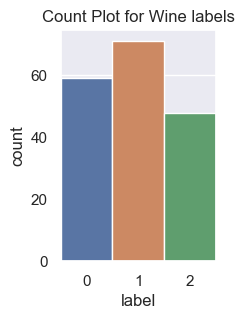

In [296]:
#Visual representation of the count of each label
sns.set(rc={'figure.figsize':(2,3)})
sns.countplot(data=df, x='label',width=1)
plt.title('Count Plot for Wine labels')
plt.show()

In [297]:
# Observation
# Label 1 is higher but there is no imbalance in data. 
# Majority belongs to label 1 followed by label 0 and rest to label 2

### Distribution

#### PAIRPLOT. Shows all the scatterplots and histograms that can be made using the numeric variables

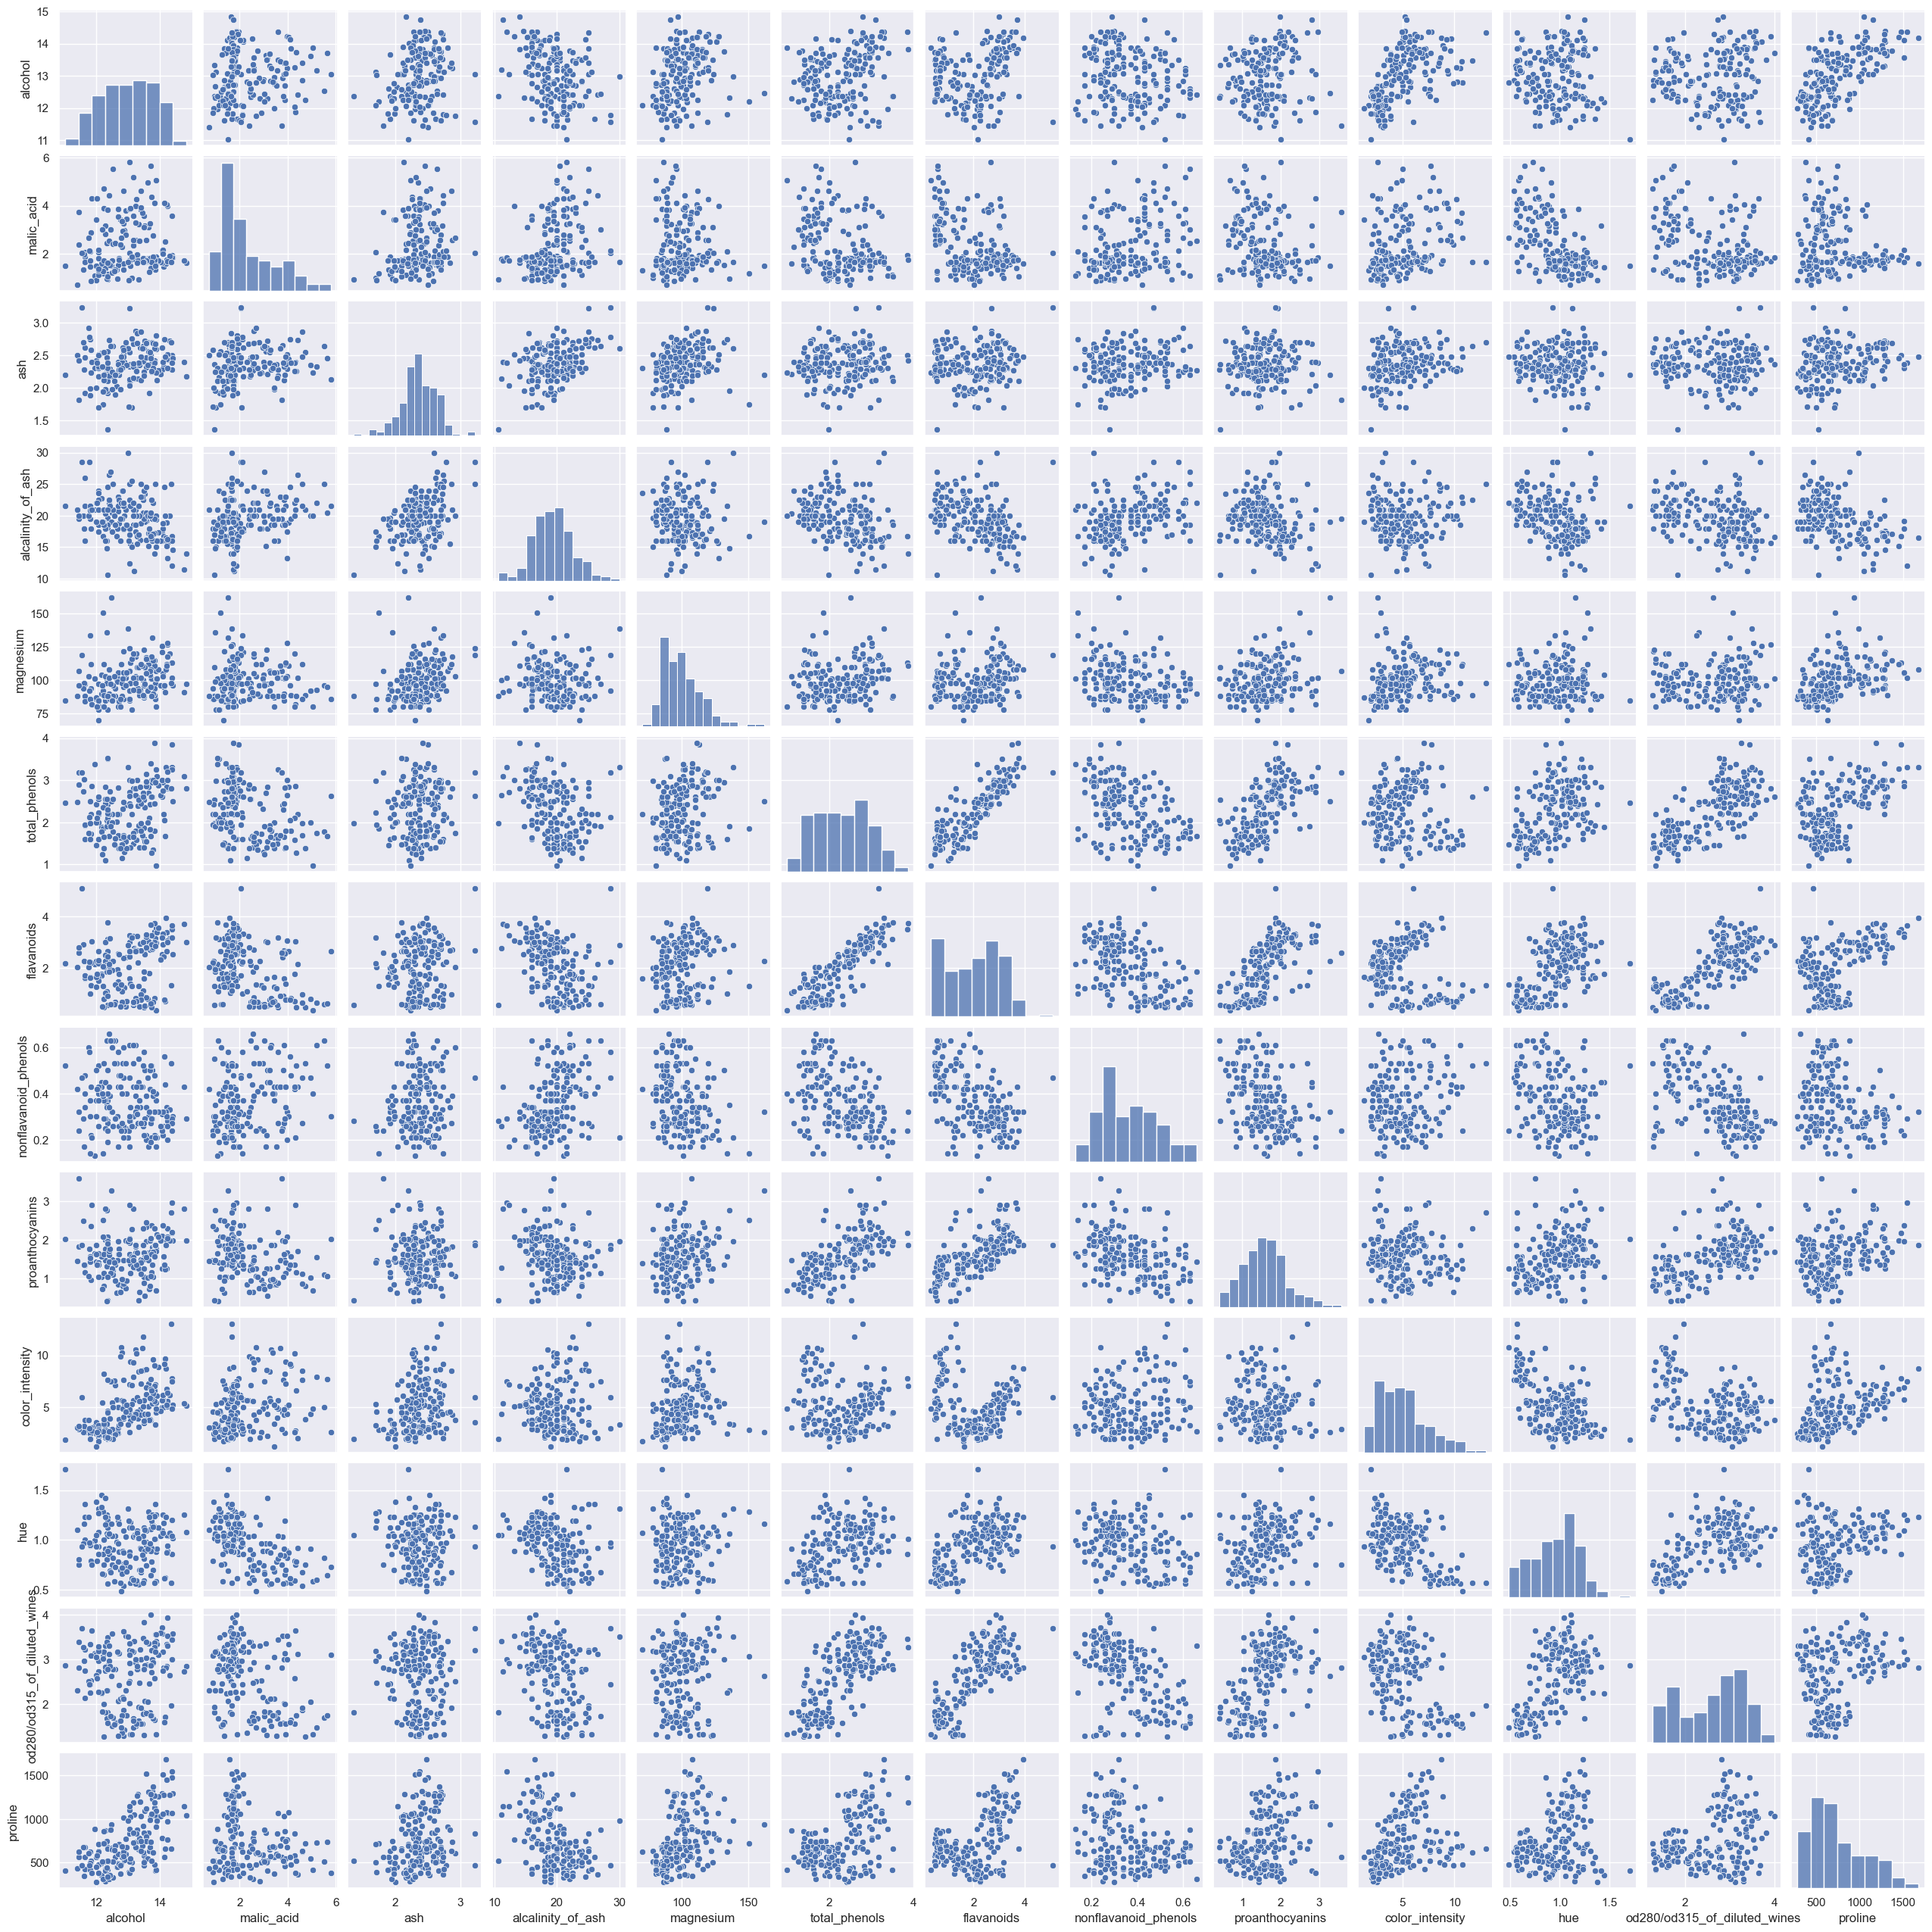

In [298]:
sns.pairplot(df.iloc[:,:-1], height =2, )
plt.show()
#Fields with normal distribution:Alcohol
#Fields with other distributions:flavanoids
#skewed fields:malic_acid, magnesium, proline, color_intesity
# Outliers: magnesium, proanthocyanins


### Histogram

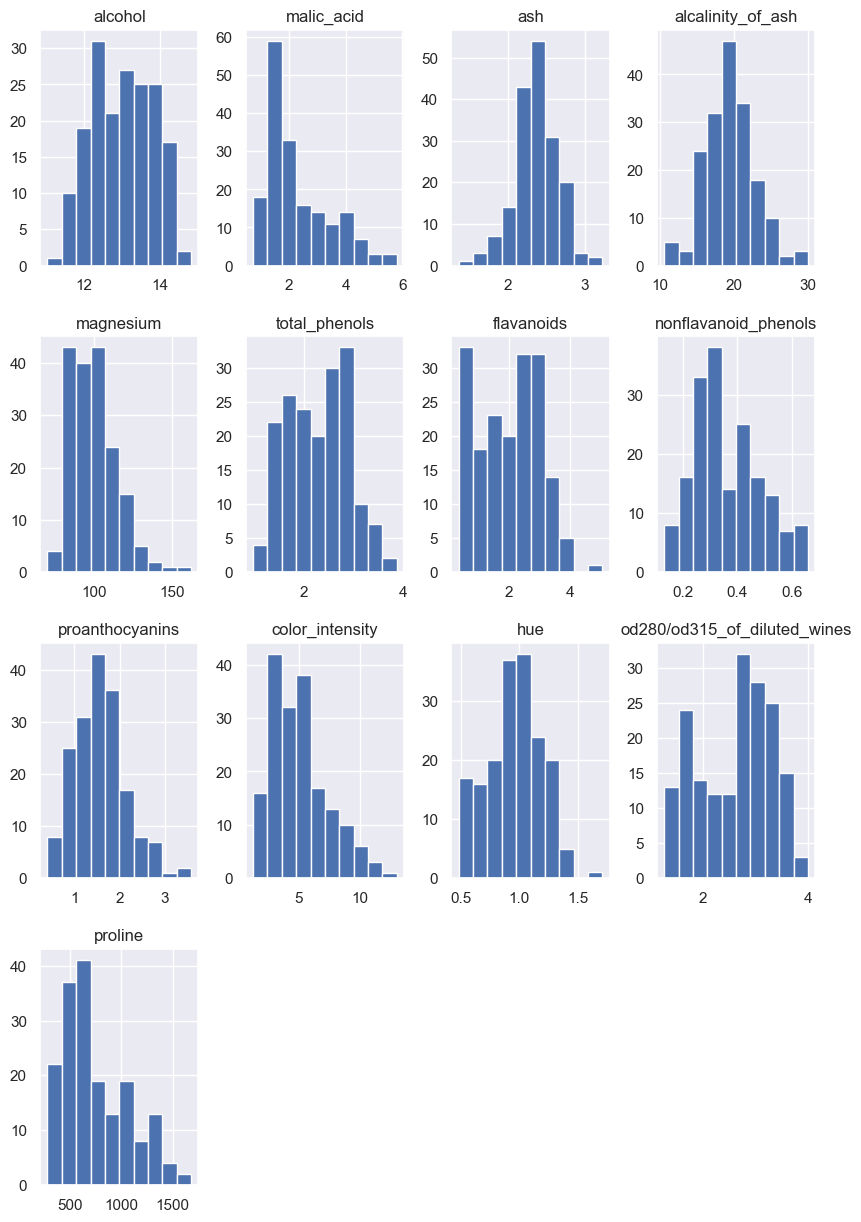

In [299]:
df.iloc[:,:-1].hist(figsize=(10,15))
plt.show();
# alcohol, alcalinity_of_ash,total_phenol, proanthcyanins
# somewhat bell shaped malic acid: skewed to the right
#ash - left skewed

### Correlation

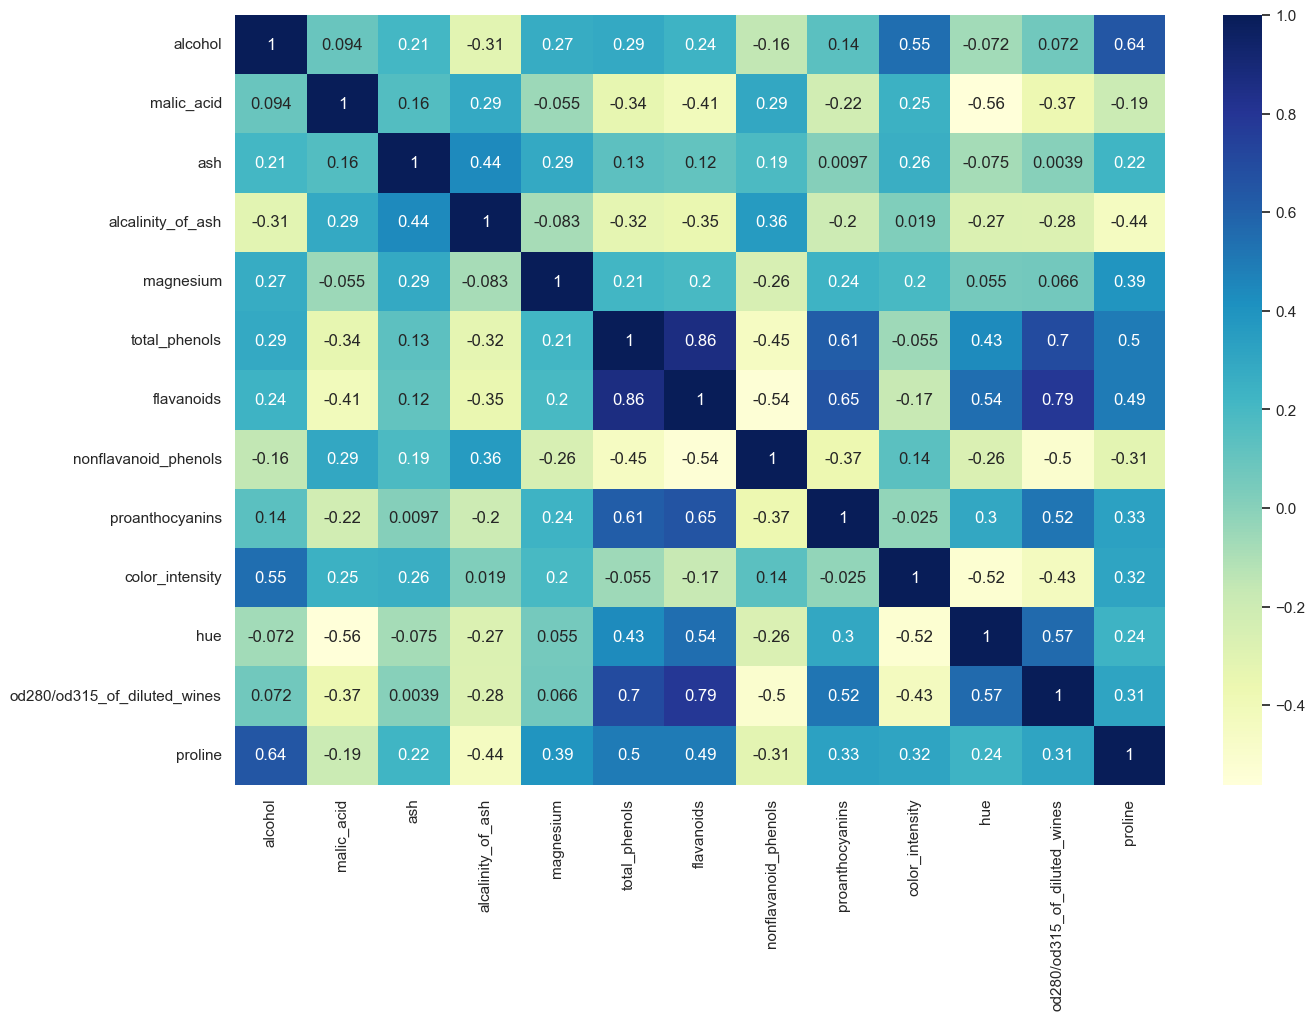

In [300]:
#Correlation - For all the features we are finding the correlation 
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

### Handling Missing values

In [301]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64


### Handle outliers

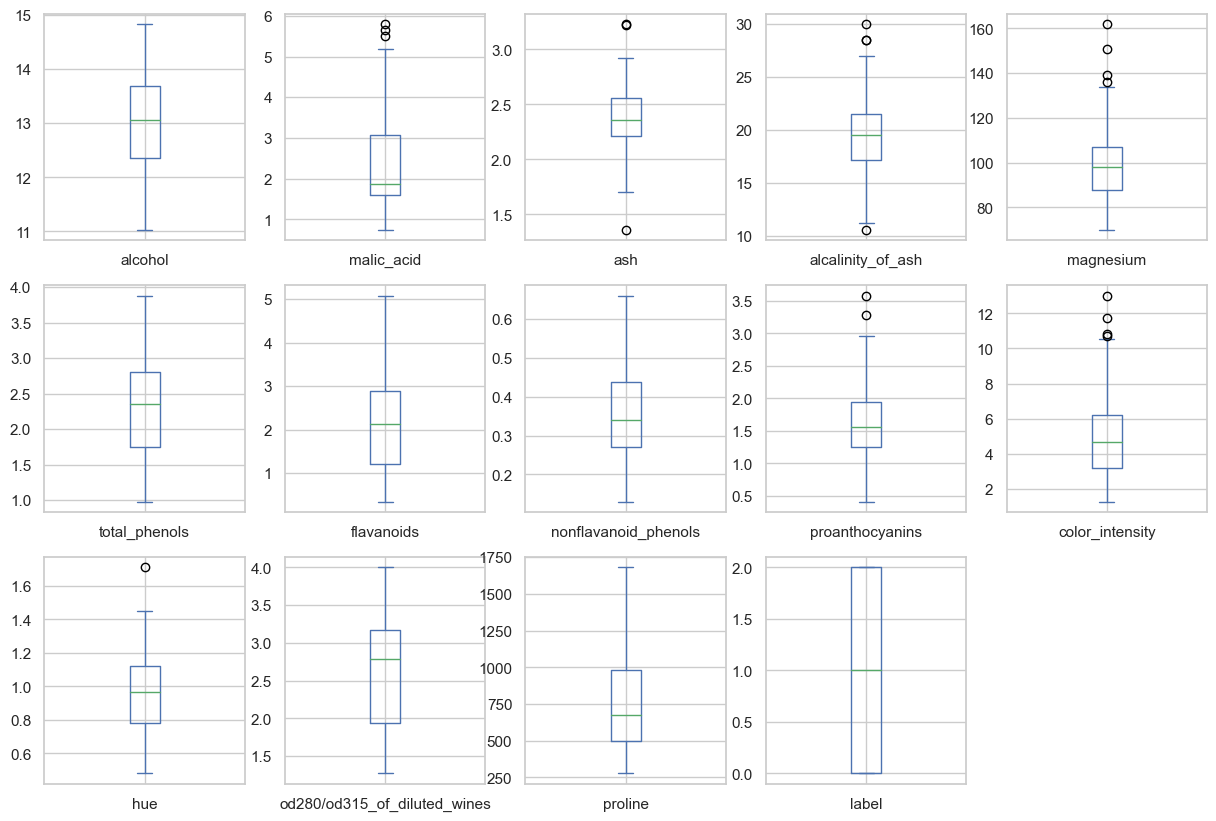

In [302]:
#Before handling outliers

sns.set(style='whitegrid',rc={'figure.figsize':(15,10)})
# Set the number of subplots in each row
num_cols = 3
df.plot(kind='box',subplots=True,layout=(3,5),sharex=False)
plt.show()


### Handle outliers using IQR

In [303]:
# Function to handle outliers using IQR
import warnings
warnings.filterwarnings("ignore")
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN or apply another strategy
    column[(column < lower_bound) | (column > upper_bound)] = 0

# Apply the function to each column in the DataFrame
for col in df.columns[1:]:  # Exclude the 'label' column
    handle_outliers_iqr(df[col])

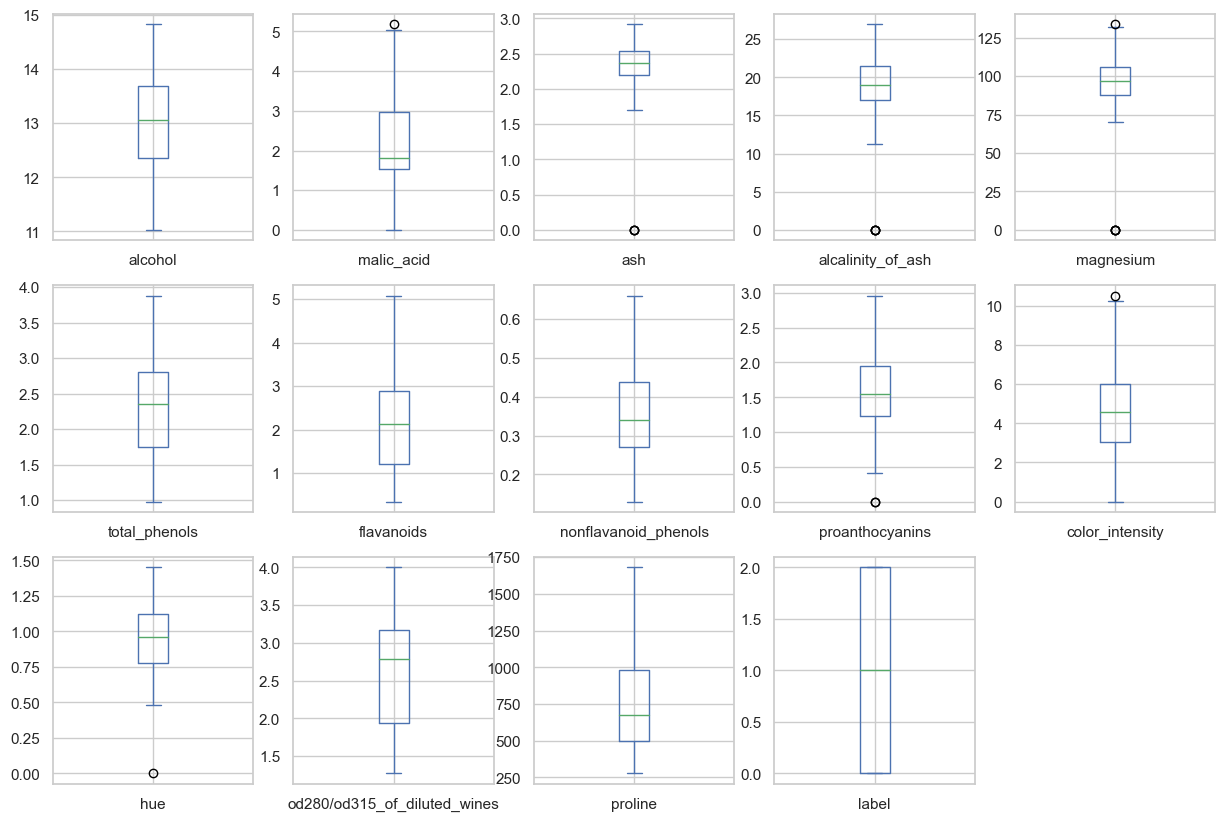

In [304]:
#After handling outliers
df.plot(kind='box',subplots=True,layout=(3,5),sharex=False)
plt.show()
#In the output we can see there are outliers in malic_acid, ash, 
#alcalinity of ash, magnesium,proanthocynannins and color_intensity.

In the above boxplot we can see that the outliers are removed

# Part 2: Data Preparation and Exploration on wine data

## Q2 : Apply relevant feature engineering and transformation techniques like Normalization, scaling. Apply any feature reduction technique on wine data set and highlight what all features are considered important by the technique used.

### Normalization and Scaling

In [313]:
# create X dataframe with features and y with the labels
X = df.drop('label', axis=1).values
y = df.label.values

### Apply MinMaxScaler technique that scales the features of a dataset to a specific range, usually [0, 1] 

In [314]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)

### PCA is a dimensionality reduction technique that transforms the original features into a set of linearly uncorrelated features called principal components.
#### Apply PCA and display the dataset

In [315]:

# Find percentage of variance for each principal component
from sklearn.decomposition import PCA
pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

PCA()

#### Display the bar chart of the principal components

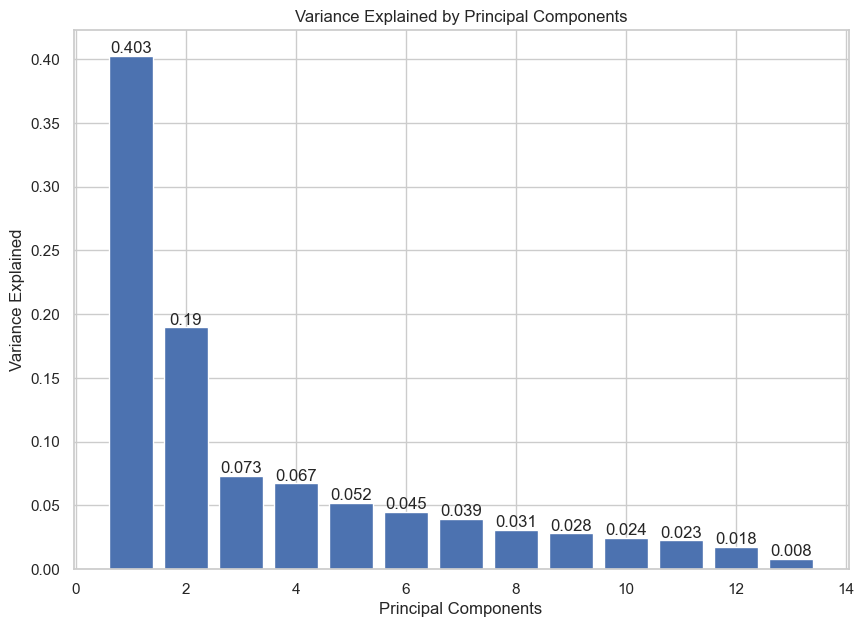

In [319]:
#Setting up the plots size
plt.figure(figsize=(10,7))
#Construct a bar plot 
#x axis represents principal components
#y azis represents variance
plt.bar(pc_range, pca.explained_variance_ratio_)
# Add annotations to each bar
for i, ratio in enumerate(pca.explained_variance_ratio_):
    plt.annotate(f'{round(ratio, 3)}', (pc_range[i], ratio), ha='center', va='bottom')

# Add labels and title
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Principal Components")

plt.show()

#### Create graph for the cummulative variance

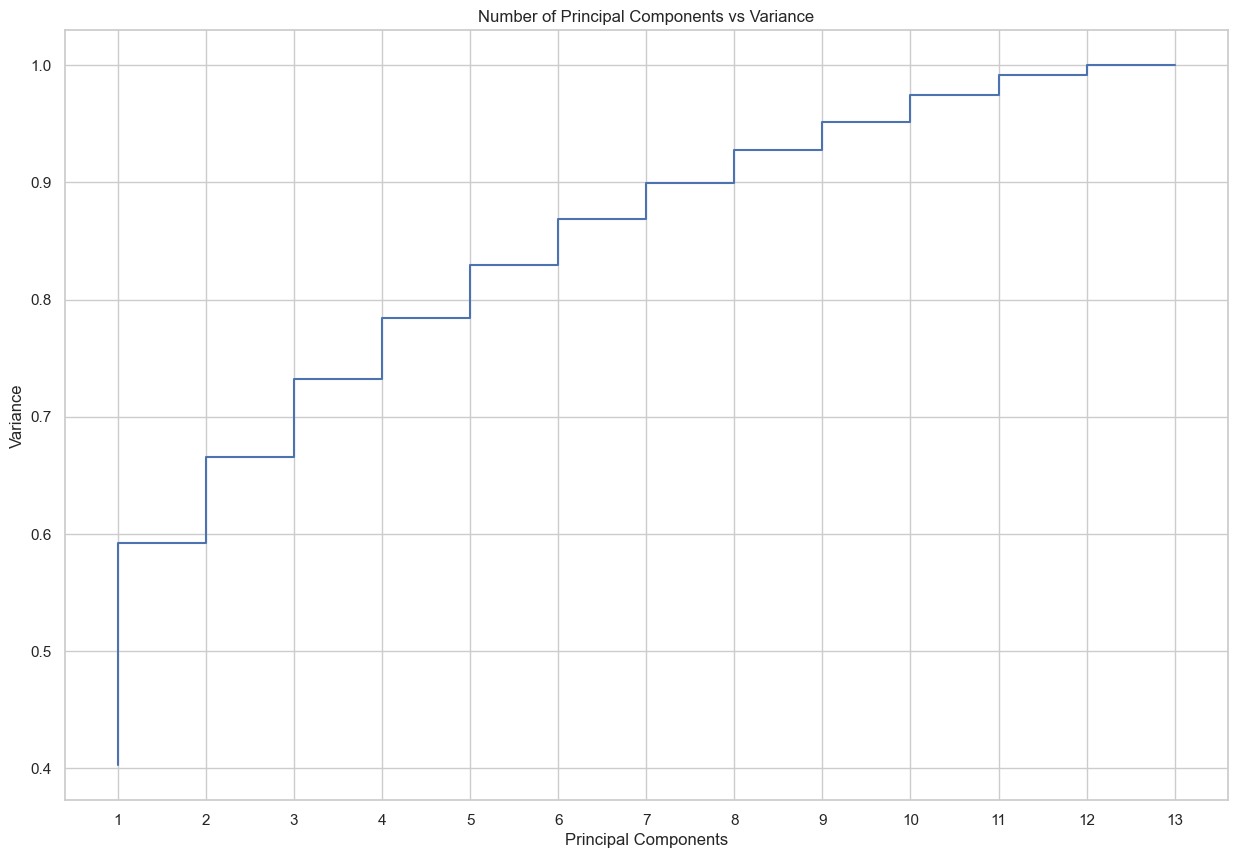

In [317]:
# Also create a graph for cummulative variance
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
_ = plt.title("Number of Principal Components vs Variance")
plt.show()

#### Print the PC and variance

In [318]:
#Printing Variance for Each Principal Component
print("PC\tvariance")
print("---\t--------")
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))

PC	variance
---	--------
PC_1:	0.403
PC_2:	0.19
PC_3:	0.073
PC_4:	0.067
PC_5:	0.052
PC_6:	0.045
PC_7:	0.039
PC_8:	0.031
PC_9:	0.028
PC_10:	0.024
PC_11:	0.023
PC_12:	0.018
PC_13:	0.008


### Scaling

In [246]:
df.to_csv('wine_modified.csv')

# Part 3: Model Building and Evaluation 

## Q1 : Split data in training and testing set. Train a base classification model for part 1. Use relevant evaluation metrics and note the performance.

### Step 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

#libraires for the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


#libraries for feature engineering

from feature_engine.imputation import MeanMedianImputer as mni
from feature_engine.discretisation import ArbitraryDiscretiser as dsc
from feature_engine.encoding import OrdinalEncoder as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Step 2: Load Dataset

In [110]:

df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 3: Identify the Datatypes and their count

In [111]:
#data types
df.dtypes
# there are categorical and numerical variables 
#lets inspect the varaible values
for var in df.columns:
    print(var,df[var].unique()[0:20],'\n')
# There are continous and discrete varaibles and also mixed variables.
#make list of varaible types
discrete = [var for var in df.columns if df[var].dtype!='O' and var !='species' and df[var].nunique() < 15]
continous = [var for var in df.columns if df[var].dtype!='O' and var not in discrete]

categorical = [var for var in df.columns if df[var].dtype=='O']


print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continous variables'.format(len(continous)))
print('There are {} categorical variables'.format(len(categorical)))

sepal_length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3] 

sepal_width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2. ] 

petal_length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4] 

petal_width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2. ] 

species ['setosa' 'versicolor' 'virginica'] 

There are 0 discrete variables
There are 4 continous variables
There are 1 categorical variables


### Step 4: Data Preprocessing and Transformation

In [ ]:
#missing data
df.isnull().mean()

#cardinality - no.of. unique categories
df[categorical].nunique()

#outliers
df[continous].boxplot(figsize=(10,4))


# value count
df['species'].value_counts()

#feature magnitude
df.describe()

#Missing data imputation
#For setosa since there are outliers we will apply median in the null values
#Impute missing values in 'petal_length' column with the median of that column

# Calculate the median of 'petal_length' for 'setosa'
setosa_median_petal_length = df[df['species'] == 'setosa']['petal_length'].median()
# Impute missing values in 'petal_length' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['petal_length'].isnull()), 'petal_length'] = setosa_median_petal_length

# Calculate the median of 'sepal_width' for 'setosa'
setosa_median_sepal_width = df[df['species'] == 'setosa']['sepal_width'].median()
# Impute missing values in 'sepal_width' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['sepal_width'].isnull()), 'sepal_width'] = setosa_median_sepal_width

#For versicolor and virginica since there are no outliers, we will impute mean in the null values
# Calculate the mean of 'sepal_length' for 'versicolor'
versicolor_mean_sepal_length = df[df['species'] == 'versicolor']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_length'].isnull()), 'sepal_length'] = versicolor_mean_sepal_length

# Calculate the median of 'sepal_width' for 'versicolor'
versicolor_mean_sepal_width = df[df['species'] == 'versicolor']['sepal_width'].mean()
# Impute missing values in 'sepal_width' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_width'].isnull()), 'sepal_width'] = versicolor_mean_sepal_width

# Calculate the mean of 'petal_length' for 'versicolor'
versicolor_mean_petal_length = df[df['species'] == 'versicolor']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['petal_length'].isnull()), 'petal_length'] = versicolor_mean_petal_length



# Calculate the mean of 'sepal_length' for 'virginica'
virginica_mean_sepal_length = df[df['species'] == 'virginica']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['sepal_length'].isnull()), 'sepal_length'] = virginica_mean_sepal_length

# Calculate the median of 'petal_length' for 'virginica'
virginica_mean_petal_length = df[df['species'] == 'virginica']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['petal_length'].isnull()), 'petal_length'] = virginica_mean_petal_length


### Step 5: Split Data into Training and Test Sets

In [114]:
# separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.2, random_state=0)                                                  
X_train.shape, X_test.shape



((134, 4), (34, 4))

### Step 6: Distribution

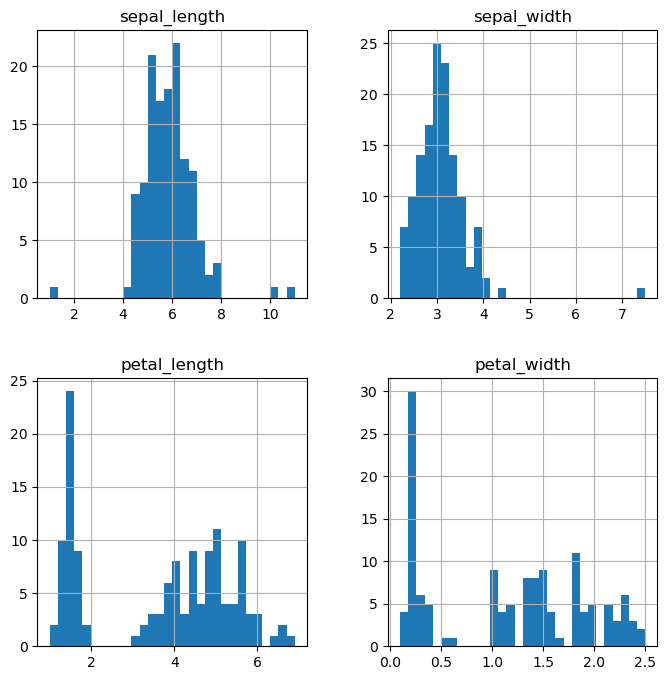

In [112]:

X_train.select_dtypes(exclude='O').isnull().mean()
X_train.select_dtypes(include='O').isnull().mean()

# Lets inspect the variable distributions
# numerical
X_train.select_dtypes(exclude='O').hist(bins=30, figsize=(8,8))
plt.show()



### Step 7: Create a pipeline, fit, predict and score 

In [113]:
from sklearn.pipeline import Pipeline
iris_pipeline = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('Decision_tree', DecisionTreeClassifier())], verbose = True)
 
# let's fit the pipeline
iris_pipeline.fit(X_train,y_train)
# Get the predictions
X_train_preds = iris_pipeline.predict_proba(X_train)[:,1]
X_test_preds = iris_pipeline.predict_proba(X_test)[:,1]


# scoring data 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, iris_pipeline.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing Decision_tree, total=   0.0s
0.9705882352941176


Observation: The model has an accuracy score of 97%

# Part 3: Model Building and Evaluation

## Q2 : Split data in training and testing set. Train a base Regression model for part 2. Use relevant evaluation metrics and note the performance.

In [116]:

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
wine = datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)


data['label'] = wine.target
data.head()

# X contains the features, y contains the target variable
X = data.drop(columns=['label'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a base regression model (e.g., Linear Regression)
base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = base_model.predict(X_test)

# Evaluate the base model
mse_base = mean_squared_error(y_test, y_pred)
r2_base = r2_score(y_test, y_pred)

print("Base Model Performance:")
print(f"Mean Squared Error: {mse_base}")
print(f"R-squared Score: {r2_base}")


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# Split the data into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a base regression model
base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Evaluate the base model
base_predictions = base_model.predict(X_test)
base_rmse = mean_squared_error(y_test, base_predictions, squared=False)
base_score = base_model.score(X_test,y_test)

print(f'Base Model RMSE: {base_rmse}')
print(f'Base Model score: {base_score}')
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model with scaled features
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

# Evaluate the model with scaled features
scaled_predictions = scaled_model.predict(X_test_scaled)
scaled_rmse = mean_squared_error(y_test, scaled_predictions, squared=False)


print(f'Model with Standard Scaling RMSE: {scaled_rmse}')

from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Evaluate the model with polynomial features
poly_predictions = poly_model.predict(X_test_poly)
poly_rmse = mean_squared_error(y_test, poly_predictions, squared=False)
poly_score = poly_model.score(X_test_poly,y_test)
print(f'Model with Polynomial Features RMSE: {poly_rmse}')
print(f'Model with Polynomial Features score: {poly_score}')


Base Model Performance:
Mean Squared Error: 0.06853348464256054
R-squared Score: 0.882514026327039
Base Model RMSE: 0.261789007871913
Base Model score: 0.882514026327039
Model with Standard Scaling RMSE: 0.2617890078719119
Model with Polynomial Features RMSE: 0.3191455547308402
Model with Polynomial Features score: 0.825393339820933


#### Observation :- Here the code trains a linear regression model on the training data (`X_train`, `y_train`), makes predictions on the test data (`X_test`), and evaluates the model's performance using Root Mean Squared Error (RMSE) and R-squared (coefficient of determination) on the test set.  Linear regression has the best score of 88% whereas Polynominal is at 83%.

# Part 3: Model Building and Evaluation 

## Qn 1:Re-train the model with transformed data in Part 1  in various iterations and note evaluation metric. Document all the improvements or deterioration observed after the various Feature engineering techniques employed.

### Step 1: Import Libraries

In [341]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score as accuracy

### Step 2: Load Dataset

In [342]:
#loading the dataset
iris = pd.read_csv('iris_modified.csv')
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

### Step 3: Split Data into Training and Test Sets

In [343]:
#separating training and test data
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)


### Step 4: Create a Pipeline

In [344]:
#creating the pipeline containing the scaler, pca and the model
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("svc", SVC())])

### Step 5: Define Hyperparameter Grid

In [345]:
#preparing the values of hyperparameters to be validated
parameters = [{"svc__kernel": ["linear"], "svc__C": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["rbf"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__gamma": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["poly"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__degree": np.arange(1,5,1)}]



### Step 6: Set up Cross-Validation

In [346]:
#set the number of subset to be created for validation
crossval= StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Step 7: Perform Grid Search for Best Hyperparameters

In [347]:
#finding the best values to assign to hyperparameters
clf = GridSearchCV(pipe, param_grid=parameters, cv=crossval, n_jobs=-1)

### Step 8: Fit the model

In [348]:
#training the model with the best hyperparameters found 
#(GridSearchCV applies them automatically)
#and  evaluate the accuracy on training and test sets
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__gamma': [0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__degree': array([1, 2, 3, 4]),
                          'svc__kernel': ['poly']}])

### Step 9: Train the Model and Predict

In [349]:
pred_train = clf.best_estimator_.predict(X_train)
pred_test = clf.best_estimator_.predict(X_test)
print(f"Best parameters are: {clf.best_params_}, with a score of {round(clf.best_score_,3)}")
print(f"Accuracy on training set is: {round(accuracy(y_train, pred_train), 3)}")
print(f"Accuracy on test set is : {round(accuracy(y_test, pred_test), 3)}")

Best parameters are: {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}, with a score of 0.983
Accuracy on training set is: 0.991
Accuracy on test set is : 1.0


## Part 3: Model Building and Evaluation 

## Qn 2:Re-train the model with transformed data in Part 2 (wine dataset) in various iterations and note evaluation metric. Document all the improvements or deterioration observed after the various Feature engineering techniques employed.

### Step 1: Import Libraries

In [98]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score as accuracy

### Step 2: Load Dataset

In [99]:
#Load the wine dataset from Scikit-learn's sample datasets. 
#It has the features X and target labels y.
wine = datasets.load_wine()
X, y = wine.data, wine.target

### Step 3: Split Data into Training and Test Sets

In [100]:
#separating training and test data
#The stratify parameter ensures that the class distribution is maintained in both sets.
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

### Step 4: Create a Pipeline

In [107]:
#Construct a machine learning pipeline with two steps: 
#scaling using MinMaxScaler and classification 
#using Support Vector Classification
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("svc", SVC())])

### Step 5: Define Hyperparameter Grid

In [102]:
#Specify a grid of hyperparameters for the SVM model. The grid includes 
#different kernel types, regularization parameters (C), 
#and additional parameters depending on the kernel type
parameters = [{"svc__kernel": ["linear"], "svc__C": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["rbf"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__gamma": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["poly"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__degree": np.arange(1,5,1)}]

### Step 6: Set up Cross-Validation

In [103]:
#Configure cross-validation with 5 folds, ensuring that class proportions are maintained 
#(StratifiedKFold).
crossval= StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Step 7: Perform Grid Search for Best Hyperparameters

In [104]:

#Create a grid search object (GridSearchCV) that optimizes the pipeline's hyperparameters 
# based on cross-validated performance.
clf = GridSearchCV(pipe, param_grid=parameters, cv=crossval, n_jobs=-1)

### Step 8: Train the Model and Evaluate

In [106]:

#Fit the model using the training data and evaluate its performance. 
#Print the best hyperparameters, the corresponding cross-validated score, 
#and the accuracy on both the training and test sets.
clf.fit(X_train, y_train)

pred_train = clf.best_estimator_.predict(X_train)
pred_test = clf.best_estimator_.predict(X_test)
print(f"Best parameters are: {clf.best_params_}, with a score of {round(clf.best_score_,3)}")
print(f"Accuracy on training set is: {round(accuracy(y_train, pred_train), 3)}")
print(f"Accuracy on test set is : {round(accuracy(y_test, pred_test), 3)}")

Best parameters are: {'svc__C': 0.01, 'svc__degree': 4, 'svc__kernel': 'poly'}, with a score of 0.976
Accuracy on training set is: 1.0
Accuracy on test set is : 0.981


# Part 4: Dimensionality Reduction 

## Apply dimensionality reduction on Part 1, specifically PCA with above 90% variance and re-train the model again and note & document all the improvements or deterioration

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Data set

In [321]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Missing data imputation

In [322]:
#Missing data imputation
#For setosa since there are outliers we will apply median in the null values
#Impute missing values in 'petal_length' column with the median of that column

# Calculate the median of 'petal_length' for 'setosa'
setosa_median_petal_length = df[df['species'] == 'setosa']['petal_length'].median()
# Impute missing values in 'petal_length' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['petal_length'].isnull()), 'petal_length'] = setosa_median_petal_length

# Calculate the median of 'sepal_width' for 'setosa'
setosa_median_sepal_width = df[df['species'] == 'setosa']['sepal_width'].median()
# Impute missing values in 'sepal_width' for 'setosa' with the calculated median
df.loc[(df['species'] == 'setosa') & (df['sepal_width'].isnull()), 'sepal_width'] = setosa_median_sepal_width

#For versicolor and virginica since there are no outliers, we will impute mean in the null values
# Calculate the mean of 'sepal_length' for 'versicolor'
versicolor_mean_sepal_length = df[df['species'] == 'versicolor']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_length'].isnull()), 'sepal_length'] = versicolor_mean_sepal_length

# Calculate the median of 'sepal_width' for 'versicolor'
versicolor_mean_sepal_width = df[df['species'] == 'versicolor']['sepal_width'].mean()
# Impute missing values in 'sepal_width' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['sepal_width'].isnull()), 'sepal_width'] = versicolor_mean_sepal_width

# Calculate the mean of 'petal_length' for 'versicolor'
versicolor_mean_petal_length = df[df['species'] == 'versicolor']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'versicolor' with the calculated mean
df.loc[(df['species'] == 'versicolor') & (df['petal_length'].isnull()), 'petal_length'] = versicolor_mean_petal_length



# Calculate the mean of 'sepal_length' for 'virginica'
virginica_mean_sepal_length = df[df['species'] == 'virginica']['sepal_length'].mean()
# Impute missing values in 'sepal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['sepal_length'].isnull()), 'sepal_length'] = virginica_mean_sepal_length

# Calculate the median of 'petal_length' for 'virginica'
virginica_mean_petal_length = df[df['species'] == 'virginica']['petal_length'].mean()
# Impute missing values in 'petal_length' for 'virginica' with the calculated mean
df.loc[(df['species'] == 'virginica') & (df['petal_length'].isnull()), 'petal_length'] = virginica_mean_petal_length



### Train test and split before applying PCA

In [324]:
X = df[list(df.columns)[:-1]]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

### Apply PCA with reducing the components to 3

In [336]:
pca = PCA(n_components=3)
x = StandardScaler().fit_transform(X_train)
new_x = pd.DataFrame(data = pca.fit_transform(x), columns = ['x1', 'x2','x3'])

df2 = pd.concat([new_x, df[['species']]], axis = 1)

### Plot the graph

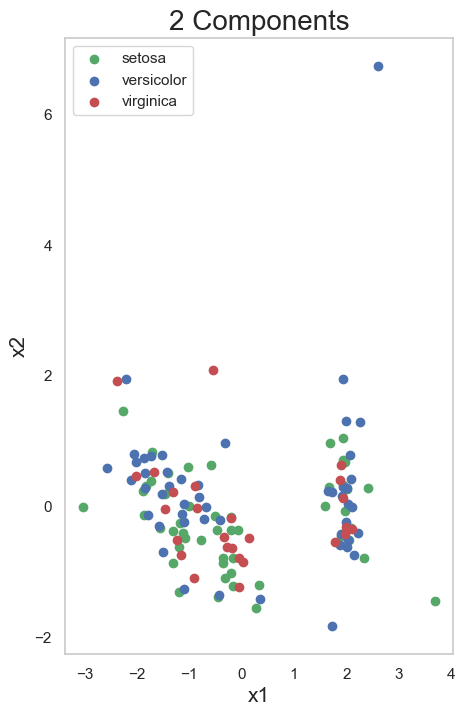

[0.62904265 0.23207967 0.13037286]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['x1', 'x2', 'x3', 'species'], dtype='object')


In [339]:
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('2 Components', fontsize = 20)
for i, j in zip(['setosa', 'versicolor', 'virginica'],['g', 'b', 'r']):
    ax.scatter(df2.loc[df2['species'] == i, 'x1'], df2.loc[df2['species'] == i, 'x2'], c = j)
ax.legend(['setosa', 'versicolor', 'virginica'])
ax.grid()
plt.show()

print (pca.explained_variance_ratio_)

print (df.columns)
print (df2.columns)


## Apply dimensionality reduction on Part 2, specifically PCA with above 90% variance and re-train the model again and note & document all the improvements or deterioration

In [352]:

import pandas as pd #manipulating datasets
import matplotlib.pyplot as plt #visual representation of data
import numpy as np #numerical calculations
from scipy.stats import norm #normalisation of data
from sklearn.preprocessing import StandardScaler, RobustScaler #standarise the data and Min max scaling
from scipy import stats #to find statistical data
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()


df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

df1 = pd.read_csv('wine_modified.csv')

#feature reduction
# I create X dataframe with features and y with the labels
X = df.drop('label', axis=1).values
y = df.label.values
# I apply feature scaling to the entire dataset in order to apply PCA to display the dataset
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)
# I determine percentage of variance for each principal component
from sklearn.decomposition import PCA
pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
_ = plt.title("Number of Principal Components vs Variance")

print('WINE DATA')
print("PC\tvariance")
print("---\t--------")
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))



WINE DATA
PC	variance
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074
PC_5:	0.056
PC_6:	0.047
PC_7:	0.037
PC_8:	0.024
PC_9:	0.023
PC_10:	0.023
PC_11:	0.014
PC_12:	0.013
PC_13:	0.008
